# Result visualisation with metadata dictionary

<img src="http://reiner-lemoine-institut.de//wp-content/uploads/2015/09/rlilogo.png" width="100" style="float: right">

__copyright__ 	= "© Reiner Lemoine Institut" <br>
__license__ 	= "GNU Affero General Public License Version 3 (AGPL-3.0)" <br>
__url__ 		= "https://www.gnu.org/licenses/agpl-3.0.en.html" <br>
__author__ 		= "Ludwig Hülk" <br>

# Imports

In [1]:
import sys
import os
import pandas as pd
import json
# plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objs as go
import plotly.offline as pltly
import colorlover as cl
import seaborn as sns
# notebook
from IPython.display import Image
from IPython.core.display import HTML 

pltly.init_notebook_mode(connected=True)
%matplotlib inline

version = 'v1'
project = 'py-plot'

# Read Data

Contains two columns: month, value.

In [2]:
file_name = 'example_data.csv'
df_example = pd.read_csv(file_name, encoding='latin1', sep=';', index_col=0, parse_dates=True)
df_example

,data
month,
Jan,211
Feb,758
Mrz,1199
Apr,1920
Mai,2176
Jun,2270
Jul,2399
Aug,2365
Sep,1449


# Metadata

The important information from the above select (**df**) is collected in a Dictionary (**info_dict**).

In [3]:
info_dict = {}

# Provenance
info_dict['Author'] = ['Ludee']
info_dict['Date'] = ['{}'.format(pd.to_datetime('today').strftime("%Y-%m-%d"))]

# Data
info_dict['Title'] = ['PV-Einspeisung pro Monat']
info_dict['Filename'] = ['{}_metadata_dict_example'.format(*info_dict['Date'])]
info_dict['Value'] = ['Einspeisung (E_AC)']
info_dict['Unit'] = ['kWh']
info_dict['Y-Axis'] = ['{} in {}'.format(*info_dict['Value'], *info_dict['Unit'])]
info_dict['X-Axis'] = ['Monat']
# info_dict['OEMetadata'] = [meta_str]

#License
info_dict['Copyright'] = ['© Reiner Lemoine Institut']
info_dict['License'] = ['Creative Commons Attribution 4.0 International (CC BY 4.0)']
info_dict['License_URL'] = ['https://creativecommons.org/licenses/by/4.0/legalcode']
info_dict['License_SPDX'] = ['CC-BY-4.0']
info_dict['Citation'] = ['{} {} | {}'.format(*info_dict['Title'], *info_dict['Copyright'], *info_dict['License_SPDX'])]


# Print facts
for x in info_dict:
    print(x,':',info_dict[x])

Author : ['Ludee']
Date : ['2022-10-17']
Title : ['PV-Einspeisung pro Monat']
Filename : ['2022-10-17_metadata_dict_example']
Value : ['Einspeisung (E_AC)']
Unit : ['kWh']
Y-Axis : ['Einspeisung (E_AC) in kWh']
X-Axis : ['Monat']
Copyright : ['© Reiner Lemoine Institut']
License : ['Creative Commons Attribution 4.0 International (CC BY 4.0)']
License_URL : ['https://creativecommons.org/licenses/by/4.0/legalcode']
License_SPDX : ['CC-BY-4.0']
Citation : ['PV-Einspeisung pro Monat © Reiner Lemoine Institut | CC-BY-4.0']


## Plot with Metadata

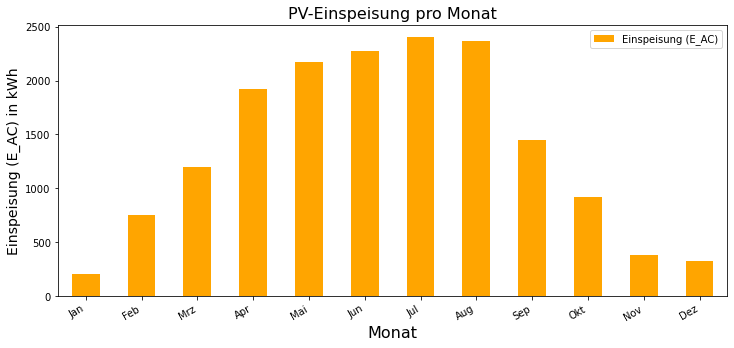

In [4]:
# Bar plot
df = df_example
mfig = plt.figure(figsize=(12, 5))
ax = plt.subplot()

df.plot.bar(ax=ax, color='orange')
plt.title(*info_dict['Title'], fontsize=16)         # Title from info
plt.ylabel(*info_dict['Y-Axis'], fontsize=14)       # Y-Label from info
plt.xlabel(*info_dict['X-Axis'], fontsize=16)       # X-Label from info
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylim(ymin=0)
ax.legend(info_dict['Value'])

## Interactive Plot with Metadata

In [5]:
# Interactive bar plot
sns.set_style('ticks')
trace_line = go.Scatter(x=df.index.tolist(), 
                        y=df['data'].tolist(), 
                        name=''.join(info_dict['Value']), line=dict(), mode='lines')
trace_bar = go.Bar(x=df.index.tolist(), 
                   y=df['data'].tolist(), 
                   name=''.join(info_dict['Value']), marker=dict())
layout = go.Layout(
    title=''.join(info_dict['Title']),
    yaxis=dict(title=''.join(info_dict['Y-Axis'])),
    xaxis=dict(title=''.join(info_dict['X-Axis']))
)
ifig_feedin = go.Figure(data=[trace_bar, trace_line], layout=layout)
pltly.iplot(ifig_feedin)

## Save results to files

The results are saved to cooresponding files in a folder named **result**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.

In [6]:
# Write facts to textfile
txtname = ('result/{}.txt').format(*info_dict['Filename'])
with open(txtname,'w') as tfile:
    for i in info_dict.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict[i]]) + "\n")
tfile.close()
print("Facts saved to file:", txtname)

# Save plot as file
plotname = 'result/{}_mfig_example.png' .format(*info_dict['Filename'])
mfig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot as file
htmlname = 'result/{}_ifig_example.html' .format(*info_dict['Filename'])
pltly.plot(ifig_feedin, filename=htmlname)
print("Plot saved to file:", htmlname)

Facts saved to file: result/2022-10-17_metadata_dict_example.txt
Plot saved to file: result/2022-10-17_metadata_dict_example_mfig_example.png
Plot saved to file: result/2022-10-17_metadata_dict_example_ifig_example.html
